# Bivariate Analysis with Seaborn

During bivariate analysis we take 2 variables and attempt to determine the empirical relationship between them. 

Firstly, we import necessary libraries and load penguins dataset as 'penguins'.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset
penguins = sns.load_dataset('penguins')

In [27]:
# Take a look at the first5 rows
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


This notebook is divided to 2 parts, whereby the first one involves creating various bivariate plots of categorical and numerical variables. In the second one we´ll look at the relationship between only numerical variables. 

## Categorical variables



### Boxplot

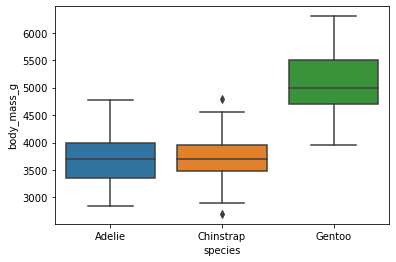

In [9]:
sns.boxplot(data = penguins, x = 'species', y = 'body_mass_g');

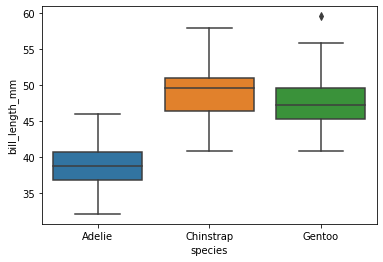

In [10]:
sns.boxplot(data = penguins, x = 'species', y = 'bill_length_mm');

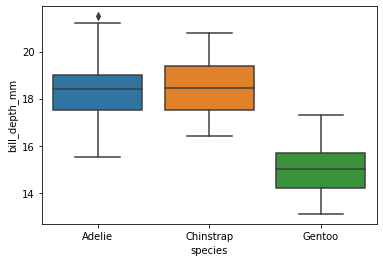

In [12]:
sns.boxplot(data = penguins, x = 'species', y = 'bill_depth_mm');

### Swarmplot

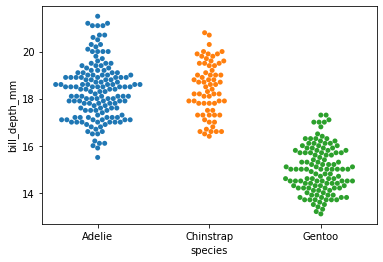

In [13]:
sns.swarmplot(data = penguins, x = 'species', y = 'bill_depth_mm');

### Stripplot

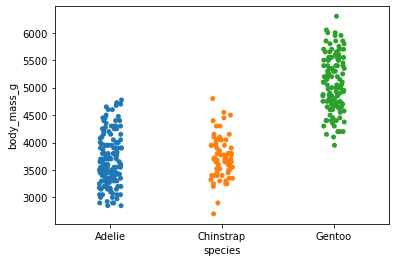

In [18]:
sns.stripplot(data = penguins, x = 'species', y = 'body_mass_g');

## Numerical variables

### Relplot

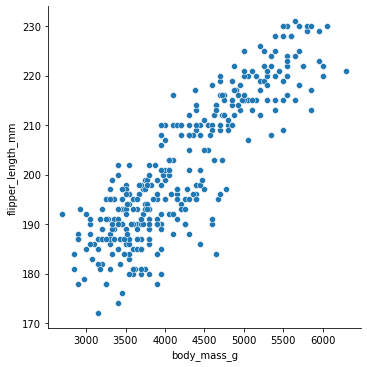

In [23]:
sns.relplot(data = penguins, x = 'body_mass_g', y = 'flipper_length_mm')

### Scatterplot

<AxesSubplot:xlabel='body_mass_g', ylabel='flipper_length_mm'>

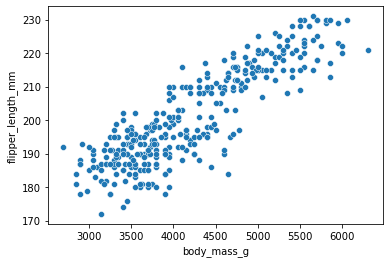

In [24]:
sns.scatterplot(data = penguins, x = 'body_mass_g', y = 'flipper_length_mm')

### Lmplot

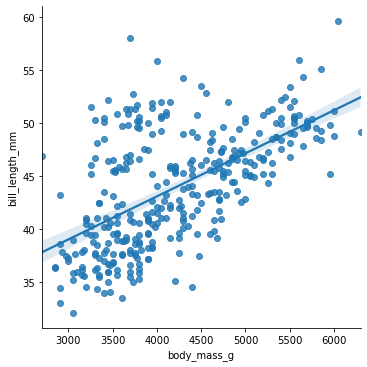

In [26]:
sns.lmplot(data = penguins, x = 'body_mass_g', y = 'bill_length_mm')